# Stochastic Regression Lab
In this lab you will use stochastic regression to categorize our favourite dataset, the MNIST handwritten digits

The Python libary we will be using is the PyTorch library

## Step One -- Import the libraries we need


In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import pandas as pd


## Step Two -- Getting the Data

The MNIST dataset is part of the PyTorch library

Load 6000 images for training 


In [2]:
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

100.0%
100.0%
100.0%
100.0%


Now load 1000 images for testing

In [4]:
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

Confirm the number of images in the data sets

In [5]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


Inspect the shape of the the first training sample, it is an 28 x 28 greyscale image and a lable

In [6]:
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])


And the label of the first two samplea

In [7]:
print("label of the first training sample: ", train_dataset[0][1])
print("label of the second training sample: ", train_dataset[1][1])

label of the first training sample:  5
label of the second training sample:  0


Display the two images to confirm what they look like

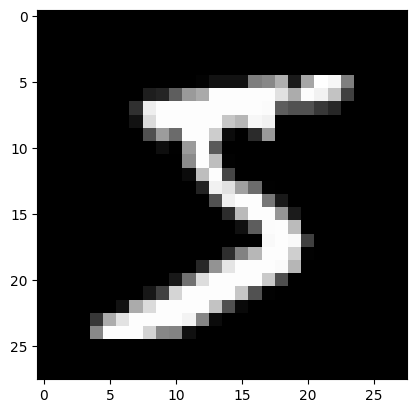

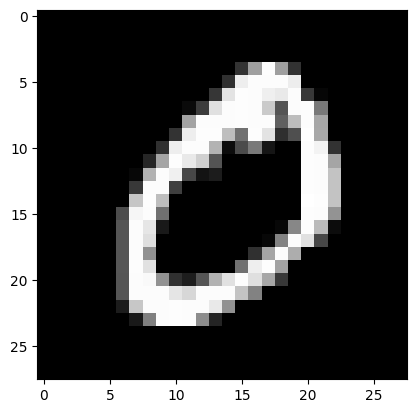

In [8]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

## Loading the Data
The data will be read in batches of 32 samples by using a DataLoader class

In [9]:
from torch.utils.data import DataLoader

batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

## Defining the model

Notice that we are setting the algorithm to Logistic Regression and the using the Sigmoid function

In [10]:
class LogisticRegression(torch.nn.Module):    
   
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
   
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

The previous step defined a module to do the work, so now you just need to create an instance of it

Notice the inputs are the 28x28 array of pixels are mapped into a single vector

In [11]:
n_inputs = 28*28
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

## Training the Model

Now the actual training begins. 
- The loss function is cross-entropy loss
- The training cost function optimization is stochastic gradient descent
- Remember that stochastic GD uses epochs to train, you will train for 50


In [15]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
epochs = 50

In [ ]:
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.6821876764297485. Accuracy: 86.42
Epoch: 1. Loss: 1.7271817922592163. Accuracy: 86.47
Epoch: 2. Loss: 1.698021650314331. Accuracy: 86.52
Epoch: 3. Loss: 1.6767891645431519. Accuracy: 86.53
Epoch: 4. Loss: 1.7089765071868896. Accuracy: 86.54
Epoch: 5. Loss: 1.703919768333435. Accuracy: 86.61
Epoch: 6. Loss: 1.7712020874023438. Accuracy: 86.69
Epoch: 7. Loss: 1.686545729637146. Accuracy: 86.76
Epoch: 8. Loss: 1.6781116724014282. Accuracy: 86.79
Epoch: 9. Loss: 1.6695061922073364. Accuracy: 86.81
Epoch: 10. Loss: 1.7083863019943237. Accuracy: 86.84
Epoch: 11. Loss: 1.6812870502471924. Accuracy: 86.87
Epoch: 12. Loss: 1.6835873126983643. Accuracy: 86.91
Epoch: 13. Loss: 1.6986355781555176. Accuracy: 86.93
Epoch: 14. Loss: 1.6591823101043701. Accuracy: 86.92
Epoch: 15. Loss: 1.6534916162490845. Accuracy: 86.92
Epoch: 16. Loss: 1.6755372285842896. Accuracy: 86.96
Epoch: 17. Loss: 1.607568621635437. Accuracy: 87.02
Epoch: 18. Loss: 1.6639354228973389. Accuracy: 87.02
Epoch: 

## Examine the rate of loss during training

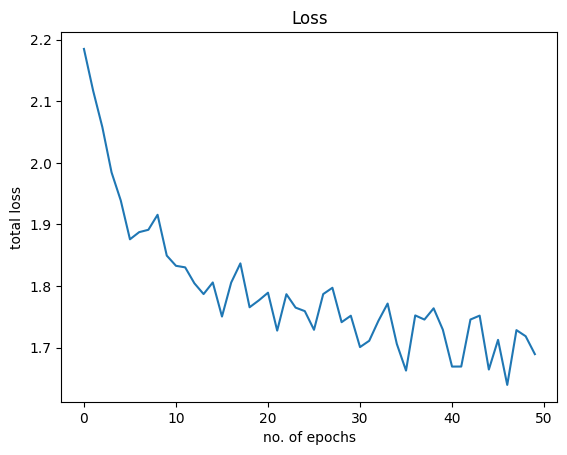

In [14]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

In [ ]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()